In [1]:
# 그래프 출력 관련 설정
# 아래 코드는 그래프를 그리고 싶을때 그대로 가져다가 한번 실행시켜주면 편합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_style("darkgrid")

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 표시 문제
mpl.rcParams['figure.figsize'] = (15,8)
	
# 한글 폰트 설정
path = 'data/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
# fm._rebuild() => Colab에서는 이 코드도 실행해주세요

In [2]:
# 엑셀 등의 데이터를 편리하게 다룰수 있는 pandas 라이브러리
import pandas as pd
import numpy as np

In [3]:
# pandas의 read_csv 함수를 사용해서 'data_3351_20221005.csv' 파일을 읽어옵니다.
# 'data_3351_20221005.csv'데이터는 한국거래소(KRX)에서 가져온 코스피200 데이터 입니다.
코스피200 = pd.read_csv('data/data_3351_20221005.csv', encoding='cp949')

In [4]:
# 데이터가 어떻게 구성되어있는지 3개만 확인해보겠습니다
코스피200.head(3)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022/10/05,289.05,0.78,0.27,293.87,294.47,287.44,138907.0,7289051.0,1.528199e+09
1,2022/10/04,288.27,6.91,2.46,286.25,288.96,285.42,120019.0,6053599.0,1.522329e+09
2,2022/09/30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09


In [5]:
# 결측치(셀에 값이 없음)를 제거합니다.
코스피200 = 코스피200.dropna()

# 데이터를 그대로 뿌리면, 최근일자부터 그래프가 그려져서
# 일자별로 정렬해서 데이터프레임을 다시 저장했습니다.
코스피200 = 코스피200.sort_values('일자')

In [6]:
# 그래프의 x축에 쓸 글자(라벨) 만들기
label_x = 코스피200['일자'].loc[[ i for i in range(0, len(코스피200), 365) ]].to_list()

In [7]:
# 처음 읽어온 코스피200 데이터는 모두 float64 자료형입니다 (float64: 64비트범위내에서 표현한 실수)
코스피200.dtypes

일자         object
종가        float64
대비        float64
등락률       float64
시가        float64
고가        float64
저가        float64
거래량       float64
거래대금      float64
상장시가총액    float64
dtype: object

In [8]:
##### 주봉 데이터를 계산하기 위한 준비 1

# float64 자료형으로 된 일자 데이터를 datetime 자료형으로 변환합니다.
# 일자데이터를 datetime으로 변환해주어야 다음 셀에서 resample함수를 적용할 수 있습니다.
코스피200['일자'] = pd.to_datetime(코스피200['일자'])
코스피200.set_index('일자', inplace=True)

In [9]:
##### 주봉데이터 만들기

# agg 함수로 각 컬럼에 적용할 함수명을 딕셔너리로 정의해줍니다.
# 시가 : 데이터프레임 클래스의 first함수 = 시가 그룹 데이터 중 가장 첫번쨰 데이터
# 고가 : 데이터프레임 클래스의 max 함수 = 고가 그룹 데이터 중 최대값
# 저가 : 데이터프레임 클래스의 min 함수 = 시가 그룹 데이터 중 최소값
# 종가 : 데이터프레임 클래스의 first 함수 = 시가 그룹 데이터 중 가장 마지막 데이터
agg_dict = {'시가': 'first',
          '고가': 'max',
          '저가': 'min',
          '종가': 'last'}

# resample 함수는 원하는 주기로 데이터를 나누어주는 함수입니다.
# W-Fri와 같이 리샘플링 기준을 작성합니다. W-Fri는 매주 금요일을 의미합니다.
# 그리고 나서 바로 데이터프레임의 집계를 하는 함수인 agg를 사용합니다.
# agg를 쓸때는 앞에 딕셔너리로 만들어준 집계조건(agg_dict)를 인자로 사용합니다.
코스피200_주봉 = 코스피200.resample('W-Fri').agg(agg_dict)
코스피200_주봉 = 코스피200_주봉.dropna()

코스피200_주봉.head(3)

,시가,고가,저가,종가
일자,,,,
2001-06-15,75.95,77.09,74.43,76.35
2001-06-22,76.15,76.41,72.43,73.59
2001-06-29,73.36,73.98,71.35,73.20


In [10]:
코스피200_주봉.index

DatetimeIndex(['2001-06-15', '2001-06-22', '2001-06-29', '2001-07-06',
               '2001-07-13', '2001-07-20', '2001-07-27', '2001-08-03',
               '2001-08-10', '2001-08-17',
               ...
               '2022-08-05', '2022-08-12', '2022-08-19', '2022-08-26',
               '2022-09-02', '2022-09-09', '2022-09-16', '2022-09-23',
               '2022-09-30', '2022-10-07'],
              dtype='datetime64[ns]', name='일자', length=1112, freq=None)

In [11]:
##### 주봉 기준으로 20이동평균과 20이평 돌파시점 데이터를 새로운 컬럼에 만들어보겠습니다.
from datetime import timedelta

### 1. 20이동평균
코스피200_주봉['MA20'] = 코스피200_주봉['종가'].rolling(window=20).mean()

### 2. 20이평 돌파
코스피200_주봉['break_up_20'] = np.nan
코스피200_주봉['break_down_20'] = np.nan

a_day = timedelta(days=1)

date_주봉 = 코스피200_주봉.index



for i in range(1, len(코스피200_주봉)):
    현재_날짜 = date_주봉[i]
    어제_날짜 = date_주봉[i-1]

    if 코스피200_주봉.loc[어제_날짜, '종가'] < 코스피200_주봉.loc[현재_날짜, 'MA20'] and 코스피200_주봉.loc[현재_날짜, '종가'] > 코스피200_주봉.loc[현재_날짜, 'MA20']:
        코스피200_주봉.loc[현재_날짜, 'break_up_20'] = 코스피200_주봉.loc[현재_날짜, 'MA20']
    if 코스피200_주봉.loc[어제_날짜, '종가'] > 코스피200_주봉.loc[현재_날짜, 'MA20'] and 코스피200_주봉.loc[현재_날짜, '종가'] < 코스피200_주봉.loc[현재_날짜, 'MA20']:
        코스피200_주봉.loc[현재_날짜, 'break_down_20'] = 코스피200_주봉.loc[현재_날짜, 'MA20']

코스피200_주봉

,시가,고가,저가,종가,MA20,break_up_20,break_down_20
일자,,,,,,,
2001-06-15,75.95,77.09,74.43,76.35,NaN,NaN,NaN
2001-06-22,76.15,76.41,72.43,73.59,NaN,NaN,NaN
2001-06-29,73.36,73.98,71.35,73.20,NaN,NaN,NaN
2001-07-06,72.87,73.97,71.12,71.18,NaN,NaN,NaN
2001-07-13,69.50,70.35,67.27,67.49,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-09-09,313.09,315.22,306.69,309.12,328.3300,NaN,NaN
2022-09-16,313.93,319.37,307.03,308.69,326.0105,NaN,NaN
2022-09-23,309.58,309.98,296.85,297.74,323.4475,NaN,NaN


In [12]:
# 일자를 기준으로 컬럼의 lineplot을 그려주는 함수 만들기
def show_graph(column_name, str_date):
    sub_data = 코스피200_주봉[코스피200_주봉.index >= str_date]

    ax = sns.lineplot(x=sub_data.index, y=sub_data[column_name], linewidth=5)
    sns.lineplot(x=sub_data.index, y=sub_data['MA20'], linewidth=1)
    

    # 마커를 표시합니다.
    # 인터넷에 matplotlib marker color, matplotlib marker character 로 검색해서 종류를 변경해보세요
    # ^는 삼각형(위), v는 삼각형(아래),r은 red, b는 blue를 의미합니다.
    # 색상, 모양, 크기(markersize)는 변경할 수 있습니다.
    ax.plot(sub_data.index, sub_data['break_up_20'], "r^", markersize=10)
    ax.plot(sub_data.index, sub_data['break_down_20'], "bv", markersize=10)

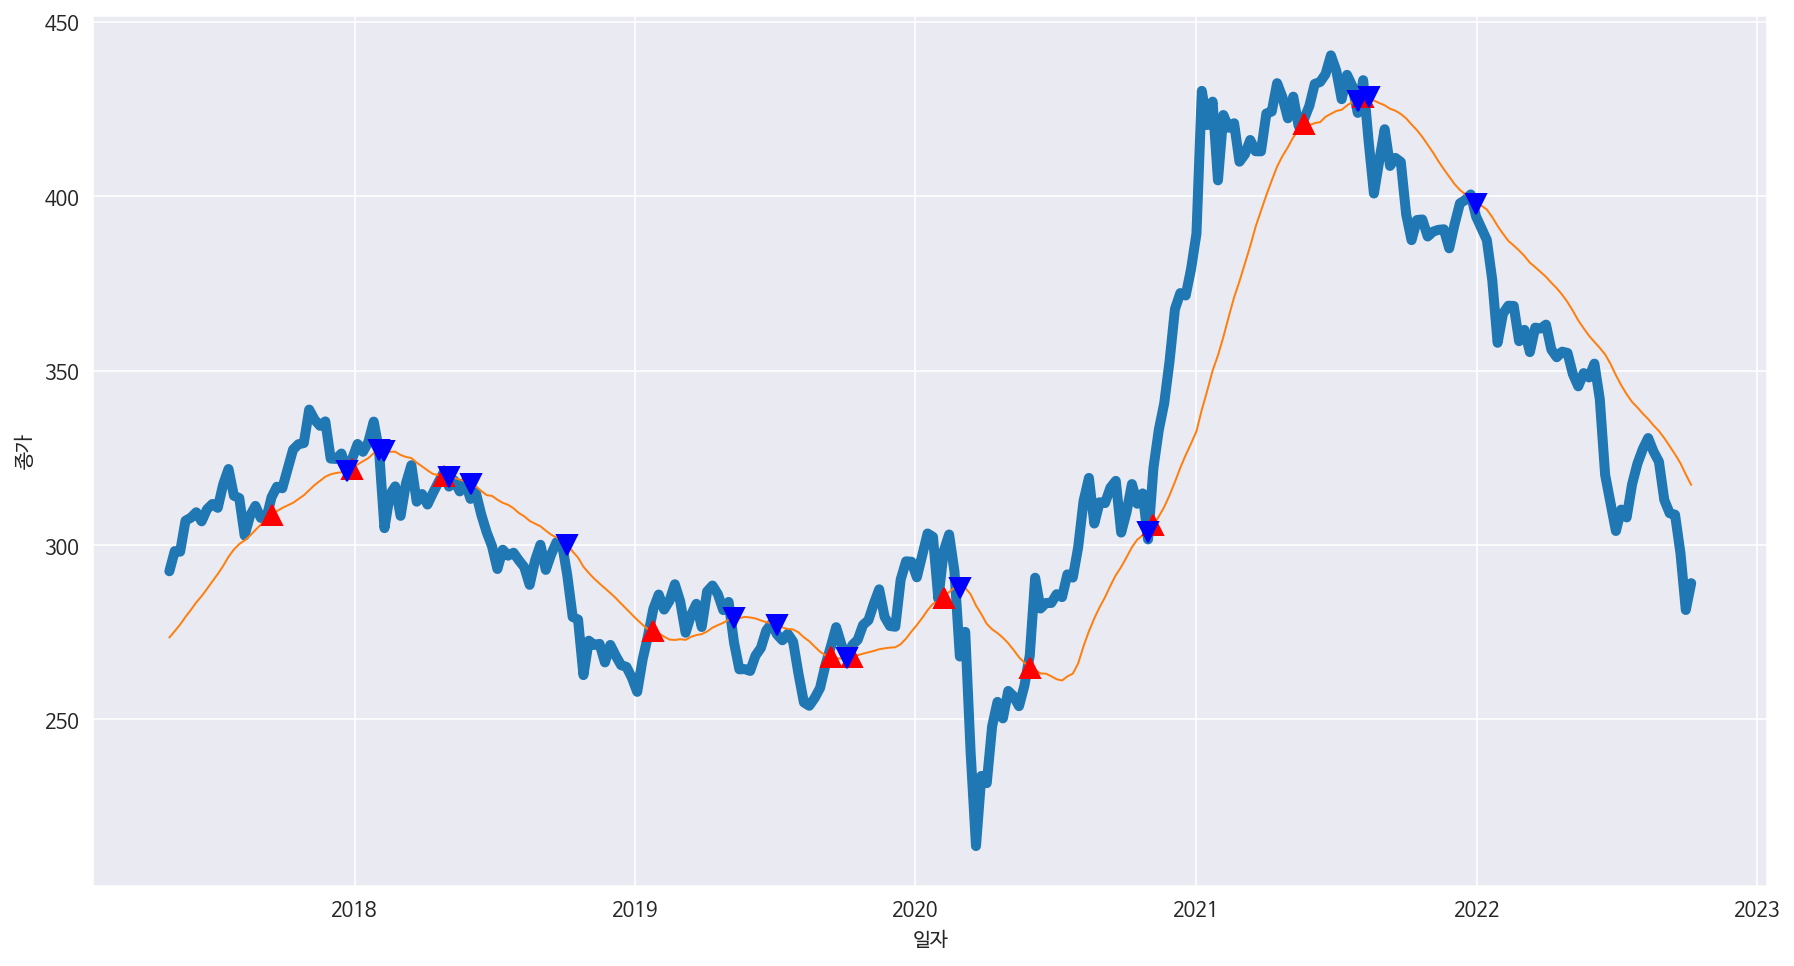

In [13]:
show_graph('종가', '2017/05/01')

In [14]:
# 이번엔 주봉 캔틀차트에 마커을 넣어보겠습니다.
import mpl_finance

def show_candle(str_date):
    sub_data = 코스피200_주봉[코스피200_주봉.index >= str_date]

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    mpl_finance.candlestick2_ohlc(ax, sub_data['시가'], sub_data['고가'], sub_data['저가'], sub_data['종가'], width=0.5, colorup='r', colordown='b')
    
    # x축 맞춰주기 위해 리스트 생성
    list_for_x_axis = [i for i in range(len(sub_data.index))]

    # 이동평균선 출력
    ax.plot(list_for_x_axis, sub_data['MA20'], label='MA20', linewidth=1)
    
    # 마커를 표시합니다.
    ax.plot(list_for_x_axis, sub_data['break_up_20'], "m^", markersize=10)
    ax.plot(list_for_x_axis, sub_data['break_down_20'], "yv", markersize=10)

c:\Users\User\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


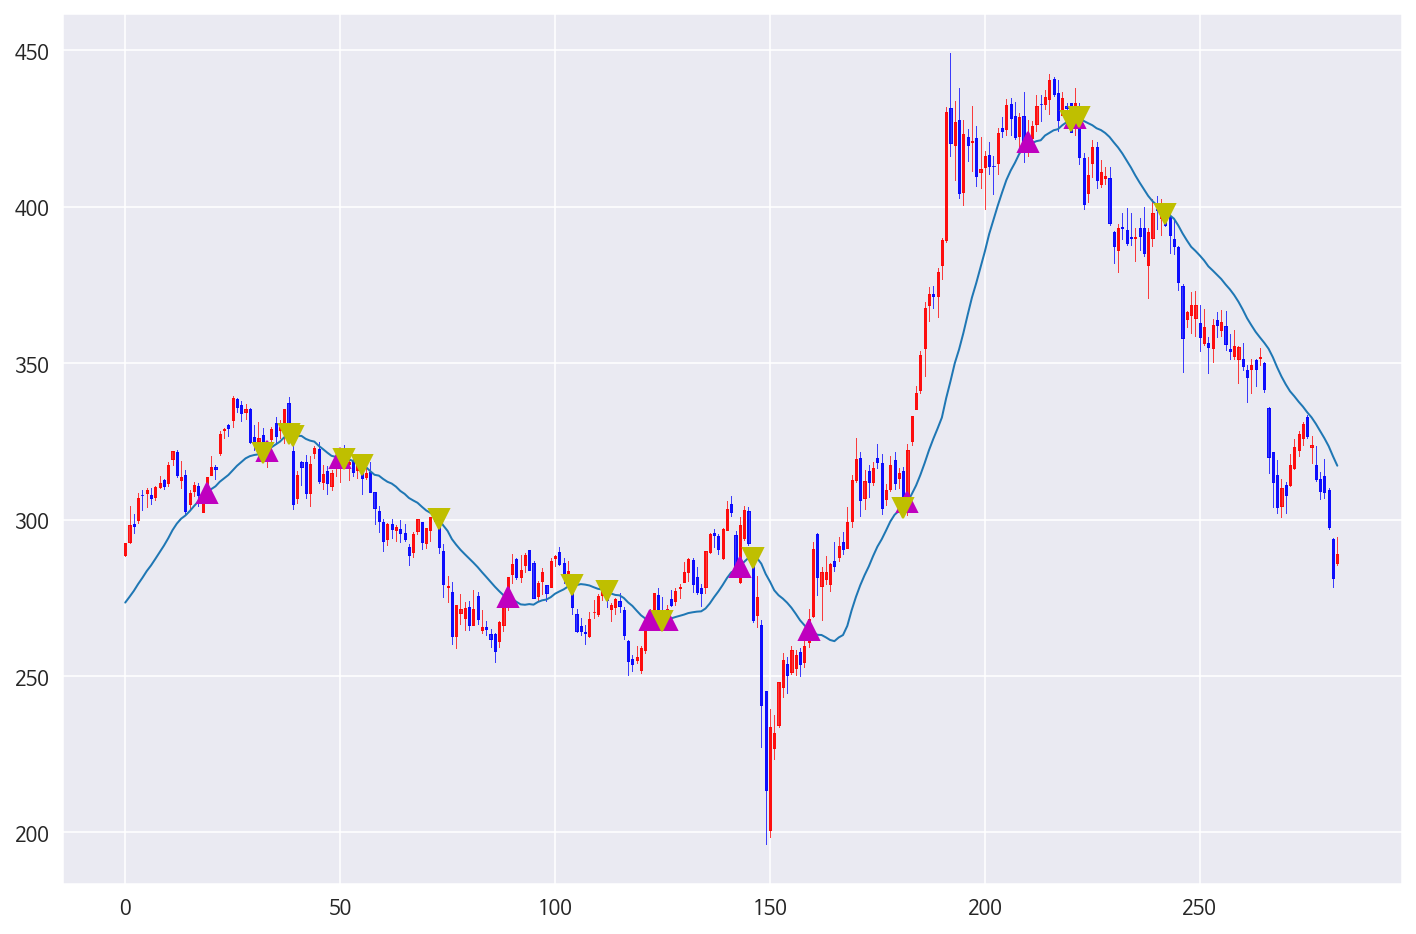

In [15]:
show_candle('2017/05/01')